## Density Estimation, KDE, Manifold Learning & DBSCAN clustering

Probability density is the relationship between observations and their probability.The overall shape of the probability density is referred to as a probability distribution, and the calculation of probabilities for specific outcomes of a random variable is performed by a probability density function, or PDF for short.

#### Why do we need to know PDF?

It is useful to know the probability density function for a sample of data in order to know whether a given observation is unlikely, or so unlikely as to be considered an outlier or anomaly and whether it should be removed. It is also helpful in order to choose appropriate learning methods that require input data to have a specific probability distribution. Knowing the probability distribution for a random variable can help to calculate moments of the distribution, like the mean and variance.

#### We'll describe 4 parts:

1. Probability Density
2. Summarize Density With a Histogram
3. Parametric Density Estimation
4. Nonparametric Density Estimation(KDE)

### Histogram

The first step is to review the density of observations in the random sample with a simple histogram. From the histogram, we might be able to identify a common and well-understood probability distribution that can be used, such as a normal distribution. If not, we may have to fit a model to estimate the distribution.

 The normal() NumPy function will achieve this and we will generate 1,000 samples with a mean of 0 and a standard deviation of 1, e.g. a standard Gaussian. The choice of the number of bins is important as it controls the coarseness of the distribution (number of bars) and, in turn, how well the density of the observations is plotted. It is a good idea to experiment with different bin sizes for a given data sample to get multiple perspectives or views on the same data.

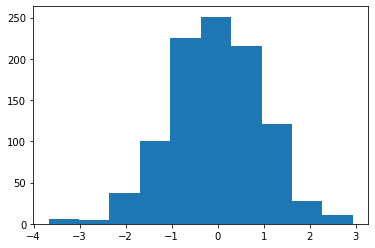

In [1]:
# example of plotting a histogram of a random sample
from matplotlib import pyplot
from numpy.random import normal
# generate a sample
sample = normal(size=1000)
# plot a histogram of the sample
pyplot.hist(sample, bins=10)
pyplot.show()

## Parametric Density Estimation

The shape of a histogram of most random samples will match a well-known probability distribution.

The common distributions are common because they occur again and again in different and sometimes unexpected domains.

Get familiar with the common probability distributions as it will help you to identify a given distribution from a histogram.

Once identified, you can attempt to estimate the density of the random variable with a chosen probability distribution. This can be achieved by estimating the parameters of the distribution from a random sample of data.

For example, the normal distribution has two parameters: the mean and the standard deviation. Given these two parameters, we now know the probability distribution function.

In [2]:
# We can generate a random sample of 1,000 observations from a normal distribution with a mean of 50 and a standard deviation of 5.
# generate a sample
sample = normal(loc=50, scale=5, size=1000)

We can then pretend that we don’t know the probability distribution and maybe look at a histogram and guess that it is normal. Assuming that it is normal, we can then calculate the parameters of the distribution, specifically the mean and standard deviation.

In [3]:
from statistics import mean
import numpy as np
from scipy.stats import norm

# calculate parameters
sample_mean = mean(sample)
sample_std = np.std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=49.932, Standard Deviation=5.072


Then fit the distribution with these parameters, so-called parametric density estimation of our data sample.
We can then sample the probabilities from this distribution for a range of values in our domain, in this case between 30 and 70.
Finally, we can plot a histogram of the data sample and overlay a line plot of the probabilities calculated for the range of values from the PDF.

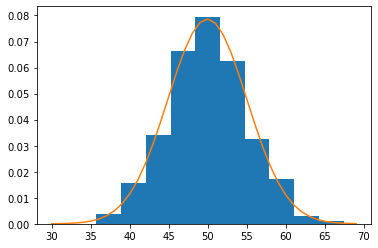

In [4]:
# define the distribution
dist = norm(sample_mean, sample_std)
# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
# plot the histogram and pdf
pyplot.hist(sample, bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

### Kernel Density Estimation (Nonparametric probability density estimation)

Kernel density estimation (KDE) is a non-parametric method for estimating the probability density function of a given random variable. It is also referred to by its traditional name, the Parzen-Rosenblatt Window method, after its discoverers. Several types of kernel functions are commonly used: 

    uniform, triangle, Epanechnikov,[1] quartic (biweight), tricube,[2] triweight, Gaussian, quadratic[3] and cosine.

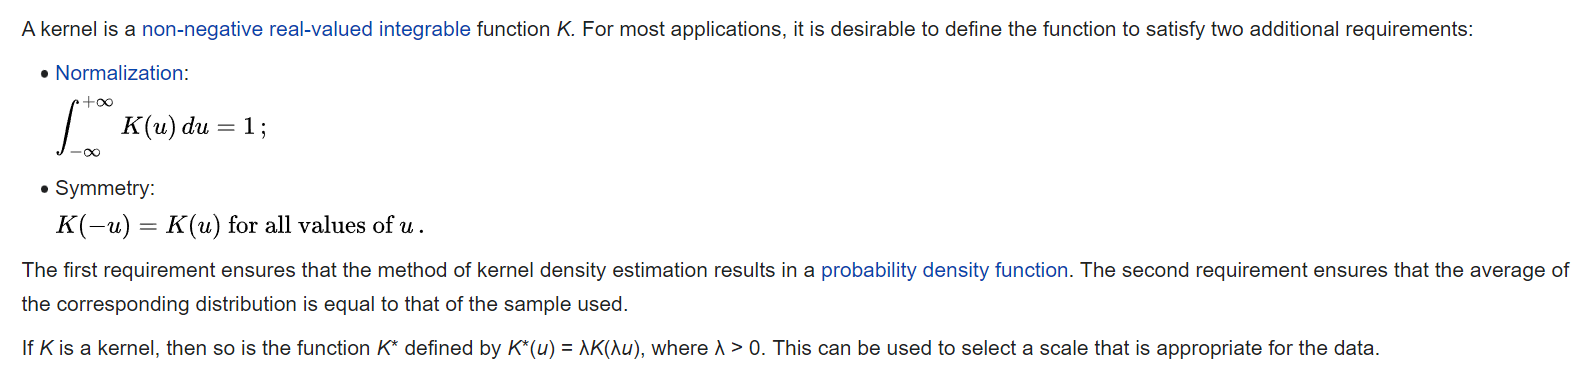

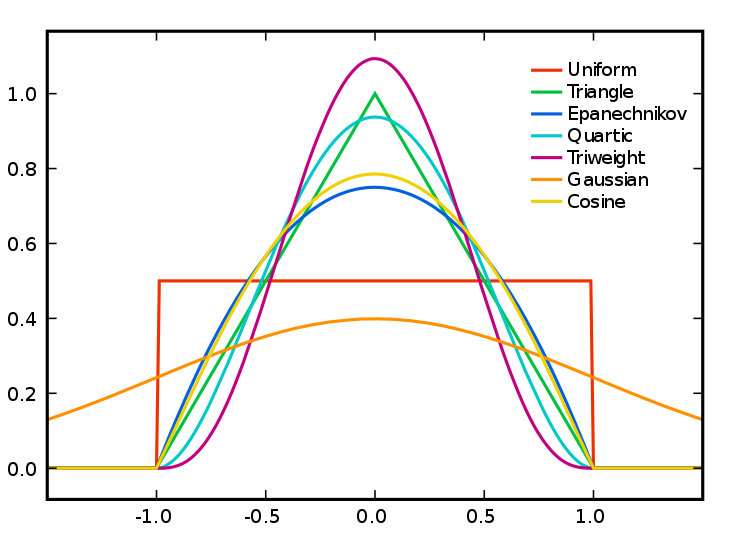

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import os
import conda
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from mpl_toolkits.basemap import Basemap #conda install -c conda-forge basemap
from sklearn.datasets.species_distributions import construct_grids
from sklearn.metrics import pairwise_distances

C:\Users\SESA475934\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\SESA475934\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.species_distributions module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Synthetic Data Generation

To demonstrate kernel density estimation, synthetic data is generated from two different types of distributions. One is an asymmetric log-normal distribution and the other one is a Gaussian distribution. The following function returns 2000 data points:

In [6]:
def generate_data(seed=17):
    # Fix the seed to reproduce the results
    rand = np.random.RandomState(seed)
    x = []
    dat = rand.lognormal(0, 0.3, 1000)
    x = np.concatenate((x, dat))
    dat = rand.normal(3, 1, 1000)
    x = np.concatenate((x, dat))
    return x

The code below stores the points in x_train. We can either make a scatter plot of these points along the y-axis or we can generate a histogram of these points.

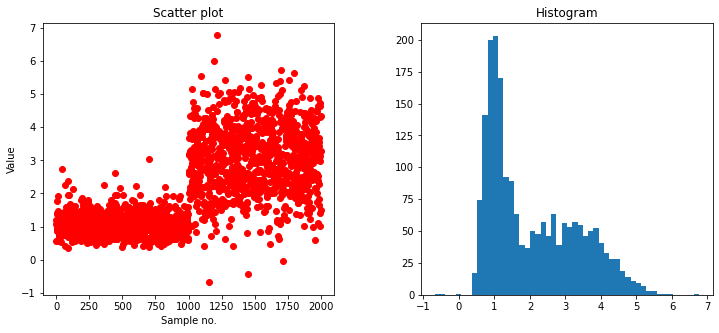

In [7]:
x_train = generate_data()[:, np.newaxis]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplot(121)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')
plt.subplot(122)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)
plt.show()

### Using Scikit-Learn's KernelDensity

To find the shape of the estimated density function, we can generate a set of points equidistant from each other and estimate the kernel density at each point. 
The test points are given by:

In [8]:
x_test = np.linspace(-1, 7, 2000)[:, np.newaxis]

Now we will create a KernelDensity object and use the fit() method to find the score of each sample as shown in the code below. The KernelDensity() method uses two default parameters, i.e. kernel=gaussian and bandwidth=1

In [9]:
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

The shape of the distribution can be viewed by plotting the density score for each point, as given below:

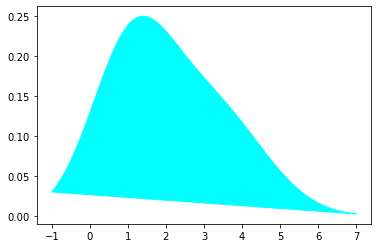

In [10]:
plt.fill(x_test, np.exp(log_dens), c='cyan')
plt.show()

### Understanding the Bandwidth Parameter

The previous example is not a very impressive estimate of the density function, attributed mainly to the default parameters. Let's experiment with different values of bandwidth to see how it affects density estimation.

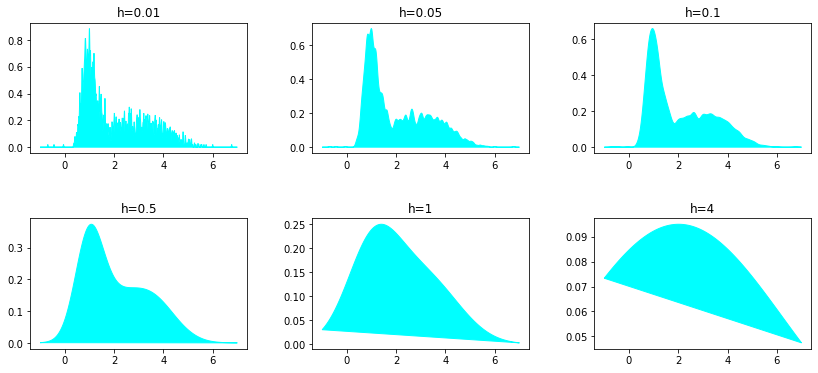

In [11]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

We can clearly see that increasing the bandwidth results in a smoother estimate. Very small bandwidth values result in spiky and jittery curves, while very high values result in a very generalized smooth curve that misses out on important details. It is important to select a balanced value for this parameter.

### Tuning the Bandwidth Parameter

The scikit-learn library allows the tuning of the bandwidth parameter via cross-validation and returns the parameter value that maximizes the log-likelihood of data. The function we can use to achieve this is GridSearchCV(), which requires different values of the bandwidth parameter.

In [12]:
bandwidth = np.arange(0.05, 2, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])})

The best model can be retrieved by using the best_estimator_ field of the GridSearchCV object.

Let's look at the optimal kernel density estimate using the Gaussian kernel and print the value of bandwidth as well:

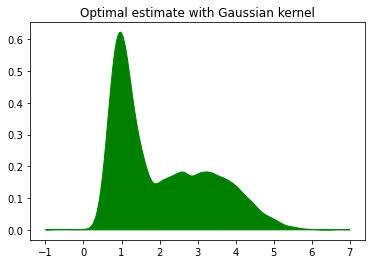

optimal bandwidth: 0.15


In [13]:
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test)
plt.fill(x_test, np.exp(log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

Now, this density estimate seems to model the data very well. The first half of the plot is in agreement with the log-normal distribution and the second half of the plot models the normal distribution quite well.

In [14]:
from statsmodels.nonparametric.kde import kernel_switch

list(kernel_switch.keys())

['gau', 'epa', 'uni', 'tri', 'biw', 'triw', 'cos', 'cos2']

### Different Kernels for Density Estimation

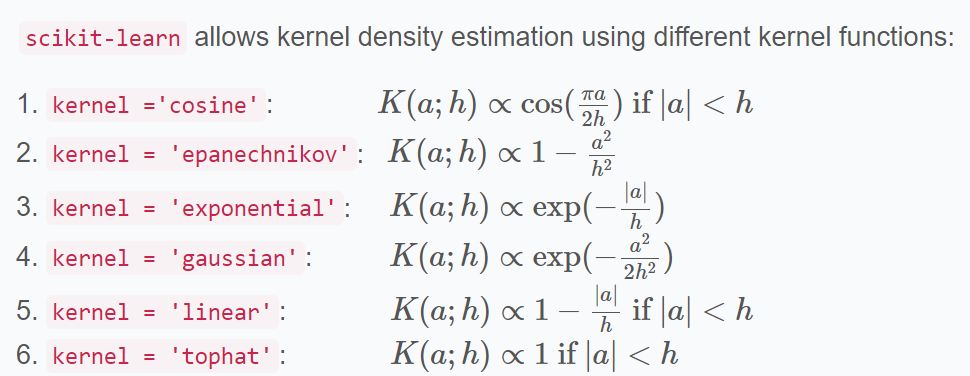

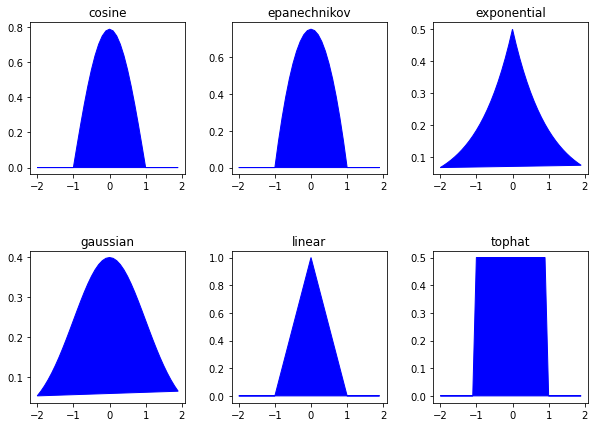

In [15]:
kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for k, ind in zip(kernels, plt_ind):
    kde_model = KernelDensity(kernel=k)
    kde_model.fit([[0]])
    score = kde_model.score_samples(np.arange(-2, 2, 0.1)[:, None])
    plt.subplot(ind)
    plt.fill(np.arange(-2, 2, 0.1)[:, None], np.exp(score), c='blue')
    plt.title(k)

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

### Experimenting With Different Kernels

Let's experiment with different kernels and see how they estimate the probability density function for our synthetic data.

We can use GridSearchCV(), as before, to find the optimal bandwidth value. However, for cosine, linear, and tophat kernels GridSearchCV() might give a runtime warning due to some scores resulting in -inf values. One possible way to address this issue is to write a custom scoring function for GridSearchCV().

In the code below, -inf scores for test points are omitted in the my_scores() custom scoring function and a mean value is returned. This is not necessarily the best scheme to handle -inf score values and some other strategy can be adopted, depending upon the data in question.

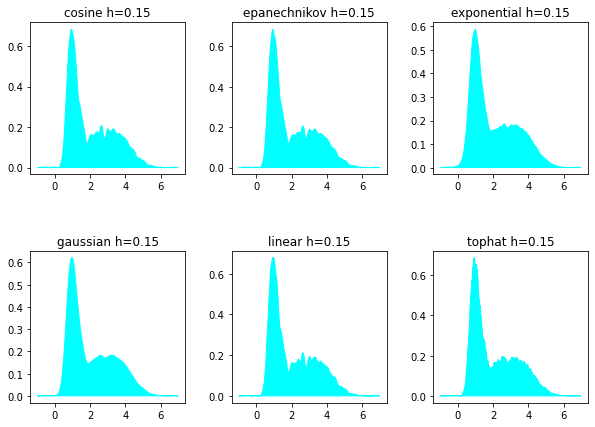

In [16]:
def my_scores(estimator, X):
    scores = estimator.score_samples(X)
    # Remove -inf
    scores = scores[scores != float('-inf')]
    # Return the mean values
    return np.mean(scores)

kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231
h_vals = np.arange(0.05, 1, .1)

for k, ind in zip(kernels, plt_ind):
    grid = GridSearchCV(KernelDensity(kernel=k),
                        {'bandwidth': h_vals},
                        scoring=my_scores)
    grid.fit(x_train)
    kde = grid.best_estimator_
    log_dens = kde.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(log_dens), c='cyan')
    plt.title(k + " h=" + "{:.2f}".format(kde.bandwidth))

fig.subplots_adjust(hspace=.5, wspace=.3)
plt.show()

### The Final Optimized Model

    The above example shows how different kernels estimate the density in different ways. One final step is to set up GridSearchCV() so that it not only discovers the optimum bandwidth, but also the optimal kernel for our example data. Here is the final code that also plots the final density estimate and its tuned parameters in the plot title:

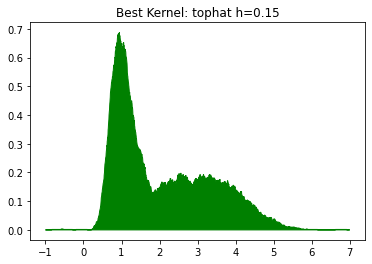

In [17]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': h_vals, 'kernel': kernels},
                    scoring=my_scores)
grid.fit(x_train)
best_kde = grid.best_estimator_
log_dens = best_kde.score_samples(x_test)
plt.fill(x_test, np.exp(log_dens), c='green')
plt.title("Best Kernel: " + best_kde.kernel+" h="+"{:.2f}".format(best_kde.bandwidth))
plt.show()

While being an intuitive and simple way for density estimation for unknown source distributions, a data scientist should use it with caution as the curse of dimensionality can slow it down considerably.

### Example: KDE on a Sphere

Here we will look at a slightly more sophisticated use of KDE for visualization of distributions. We will make use of some geographic data that can be loaded with Scikit-Learn: the geographic distributions of recorded observations of two South American mammals, Bradypus variegatus (the Brown-throated Sloth) and Microryzomys minutus (the Forest Small Rice Rat).

In [18]:
from sklearn.datasets import fetch_species_distributions

data = fetch_species_distributions()

# Get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'],
                    data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro')
                    for d in data.train['species']], dtype='int')

With this data loaded, we can use the Basemap toolkit (mentioned previously in Geographic Data with Basemap) to plot the observed locations of these two species on the map of South America.

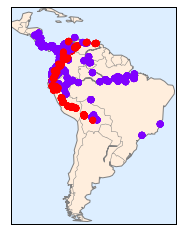

In [19]:
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

xgrid, ygrid = construct_grids(data)

# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
          c=species, cmap='rainbow', latlon=True);

Unfortunately, this doesn't give a very good idea of the density of the species, because points in the species range may overlap one another. You may not realize it by looking at this plot, but there are over 1,600 points shown here!

Let's use kernel density estimation to show this distribution in a more interpretable way: as a smooth indication of density on the map. Because the coordinate system here lies on a spherical surface rather than a flat plane, we will use the haversine distance metric, which will correctly represent distances on a curved surface.

There is a bit of boilerplate code here (one of the disadvantages of the Basemap toolkit) but the meaning of each code block should be clear:

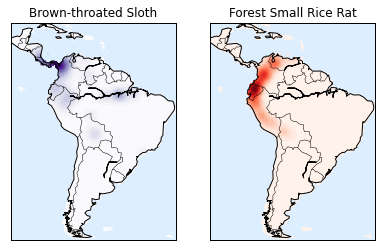

In [20]:
# Set up the data grid for the contour plot
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# Create two side-by-side plots
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Brown-throated Sloth', 'Forest Small Rice Rat']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(species_names[i])
    
    # plot coastlines with basemap
    m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                urcrnrlat=Y.max(), llcrnrlon=X.min(),
                urcrnrlon=X.max(), resolution='c', ax=axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    
    # construct a spherical kernel density estimate of the distribution
    kde = KernelDensity(bandwidth=0.03, metric='haversine')
    kde.fit(np.radians(latlon[species == i]))

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])

Compared to the simple scatter plot we initially used, this visualization paints a much clearer picture of the geographical distribution of observations of these two species.

## Manifold Learning & Curse of Dimensionality

A large number of machine learning datasets involve thousands and sometimes millions of features. These features can make training very slow. In addition, there is plenty of space in high dimensions making the high-dimensional datasets very sparse, as most of the training instances are quite likely to be far from each other. This increases the risk of overfitting since the predictions will be based on much larger extrapolations as compared to those on low-dimensional data. This is called the curse of dimensionality.

There are two main approaches for dimensionality reduction: Projection and Manifold Learning. Here, we will focus on the latter.

### What is a manifold?

A two-dimensional manifold is any 2-D shape that can be made to fit in a higher-dimensional space by twisting or bending it, loosely speaking.

### What is the Manifold Hypothesis?

“The Manifold Hypothesis states that real-world high-dimensional data lie on low-dimensional manifolds embedded within the high-dimensional space.”

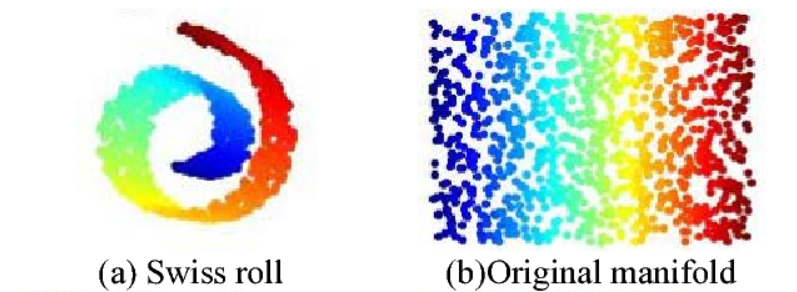

We have seen how principal component analysis (PCA) can be used in the dimensionality reduction task—reducing the number of features of a dataset while maintaining the essential relationships between the points. While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data; we will see some examples of these below.

To address this deficiency, we can turn to a class of methods known as manifold learning—a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces. When you think of a manifold, I'd suggest imagining a sheet of paper: this is a two-dimensional object that lives in our familiar three-dimensional world, and can be bent or rolled in that two dimensions. In the parlance of manifold learning, we can think of this sheet as a two-dimensional manifold embedded in three-dimensional space.

Rotating, re-orienting, or stretching the piece of paper in three-dimensional space doesn't change the flat geometry of the paper: such operations are akin to linear embeddings. If you bend, curl, or crumple the paper, it is still a two-dimensional manifold, but the embedding into the three-dimensional space is no longer linear. Manifold learning algorithms would seek to learn about the fundamental two-dimensional nature of the paper, even as it is contorted to fill the three-dimensional space.

Here we will demonstrate a number of manifold methods, going most deeply into a couple techniques: multidimensional scaling (MDS), locally linear embedding (LLE), and isometric mapping (IsoMap).

### Manifold Learning: "HELLO"

To make these concepts more clear, let's start by generating some two-dimensional data that we can use to define a manifold. Here is a function that will create data in the shape of the word "HELLO".

In [21]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(5, 2))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

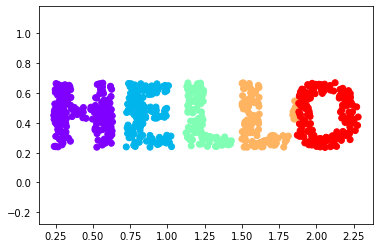

In [22]:
#Let's call the function and visualize the resulting data:

X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

The output is two dimensional, and consists of points drawn in the shape of the word, "HELLO". This data form will help us to see visually what these algorithms are doing.

### Multidimensional Scaling (MDS)

Looking at data like this, we can see that the particular choice of x and y values of the dataset are not the most fundamental description of the data: we can scale, shrink, or rotate the data, and the "HELLO" will still be apparent. For example, if we use a rotation matrix to rotate the data, the x and y values change, but the data is still fundamentally the same:

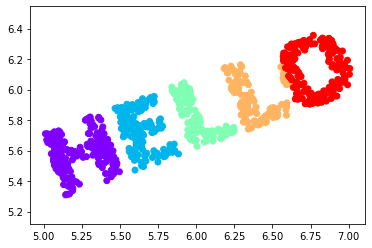

In [23]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

This tells us that the x and y values are not necessarily fundamental to the relationships in the data. What is fundamental, in this case, is the distance between each point and the other points in the dataset. A common way to represent this is to use a distance matrix: for  N  points, we construct an  N×N  array such that entry  (i,j)  contains the distance between point  i  and point  j . Let's use Scikit-Learn's efficient pairwise_distances function to do this for our original data:

In [24]:
D = pairwise_distances(X)
D.shape

(769, 769)

As promised, for our N=1,000 points, we obtain a 1000×1000 matrix, which can be visualized as shown here:

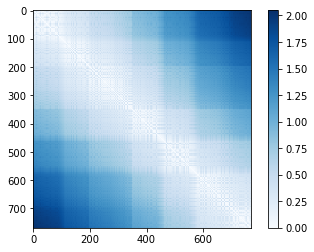

In [25]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

If we similarly construct a distance matrix for our rotated and translated data, we see that it is the same:

In [26]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

This distance matrix gives us a representation of our data that is invariant to rotations and translations, but the visualization of the matrix above is not entirely intuitive. In the representation shown in this figure, we have lost any visible sign of the interesting structure in the data: the "HELLO" that we saw before.

Further, while computing this distance matrix from the (x, y) coordinates is straightforward, transforming the distances back into x and y coordinates is rather difficult. This is exactly what the multidimensional scaling algorithm aims to do: given a distance matrix between points, it recovers a  D -dimensional coordinate representation of the data. Let's see how it works for our distance matrix, using the precomputed dissimilarity to specify that we are passing a distance matrix:

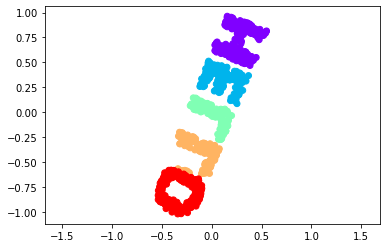

In [27]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

The MDS algorithm recovers one of the possible two-dimensional coordinate representations of our data, using only the  N×N  distance matrix describing the relationship between the data points.

### MDS as Manifold Learning

The usefulness of this becomes more apparent when we consider the fact that distance matrices can be computed from data in any dimension. So, for example, instead of simply rotating the data in the two-dimensional plane, we can project it into three dimensions using the following function (essentially a three-dimensional generalization of the rotation matrix used earlier):

In [28]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(769, 3)

Let's visualize these points to see what we're working with:

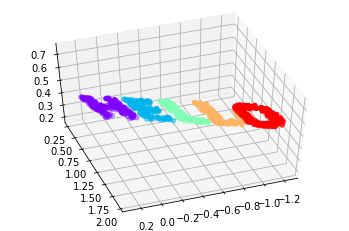

In [29]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

We can now ask the MDS estimator to input this three-dimensional data, compute the distance matrix, and then determine the optimal two-dimensional embedding for this distance matrix. The result recovers a representation of the original data:

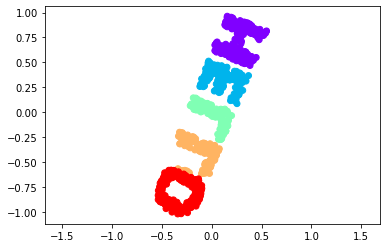

In [30]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

#### This is essentially the goal of a manifold learning estimator: given high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data. In the case of MDS, the quantity preserved is the distance between every pair of points.

## Density based clustering - DBSCAN Algorithm

Clustering analysis or simply Clustering is basically an Unsupervised learning method that divides the data points into a number of specific batches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense

Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

#### eps: 
specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors
    
#### minpts: 
The parameter MinPts is the minimum number of neighbors within “eps” radius. Any point x in the data set, with a neighbor count greater than or equal to MinPts, is marked as a core point.

In this algorithm, we have 3 types of data points.

    Core Point: A point is a core point if it has more than MinPts points within eps. 
    Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 
    Noise or outlier: A point which is not a core point or border point.

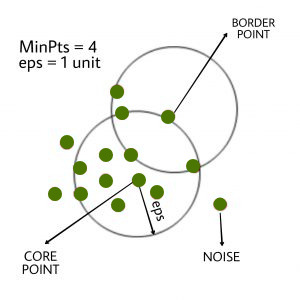

### Pseudo Algorithm

DBSCAN(dataset, eps, MinPts){

C = 1

for each unvisited point p in dataset {
         
         mark p as visited
         # find neighbors
         Neighbors N = find the neighboring points of p

         if |N|>=MinPts:
             N = N U N'
             if p' is not a member of any cluster:
                 add p' to cluster C 
}

[-1  0 -1  0 -1 -1 -1  2 -1 -1  1 -1  2 -1 -1  2  2  3  1 -1 -1  3  2  1
  1 -1  3  2 -1 -1 -1  0 -1 -1  0 -1  0 -1  1  3 -1  1 -1 -1  1  1  0  1
  0 -1  1  3 -1  3 -1  1 -1 -1  0  3 -1  2 -1  1  1  1 -1  3 -1  1  2 -1
  0  1 -1  0  1  2  3  0 -1  2 -1  3  0 -1  3  2 -1  0  2  3 -1  1  1 -1
 -1  3 -1 -1 -1 -1 -1  3  2  3 -1  2 -1 -1 -1  1  3 -1  3 -1  0 -1 -1 -1
 -1  3  1  3 -1  3  3  1 -1  1 -1  1  1 -1  0 -1 -1  0 -1 -1 -1  1 -1 -1
 -1  1  0 -1  0  0  0  2 -1  2 -1  1  0  1  3  2 -1  2  2 -1  2 -1 -1 -1
 -1 -1  2  0  3 -1 -1  0 -1  3  2  1  3 -1  1  1  2  2 -1  2 -1  0 -1  1
  2  2  1  1 -1 -1  1  0 -1  1 -1  1 -1 -1  1 -1  2 -1  2  1 -1 -1  0  1
  1  3 -1  2  0  3  3 -1 -1 -1 -1 -1  0 -1  2 -1  2 -1  1  2  3  1 -1  1
 -1  2 -1  0  0  0  0  1  1 -1 -1  1  3  2  1 -1 -1 -1  3  0  2  2 -1  3
 -1  1 -1 -1 -1  3  3 -1  1 -1 -1 -1 -1 -1  0  0 -1  3 -1  3  3 -1  0 -1
 -1  2 -1  3  0 -1  0 -1 -1  2 -1  1]
['y', 'b', 'g', 'r']


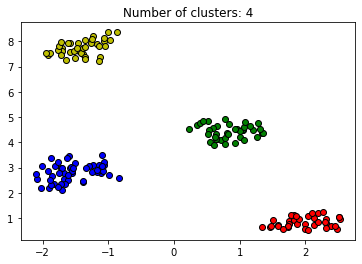

In [31]:
# Load data in X

X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)
  
# Plot result  
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('Number of clusters: %d' % n_clusters_)
plt.show()

Black points(if any) represent outliers. By changing the eps and the MinPts , we can change the cluster configuration.